In [1]:
#inline plotting
# needed to install 
#pip install h5netcdf
#pip install cdflib
#pip install sunpy
#conda install pytables

%matplotlib inline

In [2]:
#import heliopy for reading in omni
#matplot lib for plotting
#datetime for dates

import heliopy.data.omni as omni
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

In [3]:
start_date = datetime(2016,4,1)
end_date = datetime(2018,4,1)

#dst value to trigger
# a storm and to set
# +/- for momentum
dst_thresh =-40
dst_mom    =-30 

#pressure value for
# momentum
pre_mom = 2

In [4]:
#load data convert to dataframe 
# and reset index (for easier looping)
omni_data = omni.h0_mrg1hr(start_date,end_date)
omni_df = omni_data.to_dataframe()
omni_df = omni_df.reset_index()

In [5]:
omni_df.head()
print(omni_df.columns.tolist())

['Time', 'Epoch_1800', 'Rot1800', 'IMF1800', 'PLS1800', 'IMF_PTS1800', 'PLS_PTS1800', 'ABS_B1800', 'F1800', 'THETA_AV1800', 'PHI_AV1800', 'BX_GSE1800', 'BY_GSE1800', 'BZ_GSE1800', 'BY_GSM1800', 'BZ_GSM1800', 'SIGMA$ABS_B1800', 'SIGMA$B1800', 'SIGMA$Bx1800', 'SIGMA$By1800', 'SIGMA$Bz1800', 'T1800', 'N1800', 'V1800', 'PHI$V1800', 'THETA$V1800', 'Ratio1800', 'Pressure1800', 'SIGMA$T1800', 'SIGMA$N1800', 'SIGMA$V1800', 'SIGMA$PHI$V1800', 'SIGMA$THETA$V1800', 'SIGMA$ratio1800', 'E1800', 'Beta1800', 'Mach_num1800', 'Mgs_mach_num1800', 'PR$FLX_11800', 'PR$FLX_21800', 'PR$FLX_41800', 'PR$FLX_101800', 'PR$FLX_301800', 'PR$FLX_601800', 'MFLX1800', 'R1800', 'F10_INDEX1800', 'KP1800', 'DST1800', 'AE1800', 'AP_INDEX1800', 'AL_INDEX1800', 'AU_INDEX1800', 'PC_N_INDEX1800', 'Solar_Lyman_alpha1800', 'Proton_QI1800', 'Rot$', 'IMF', 'PLS', 'IMF_PTS', 'PLS_PTS', 'ABS_B', 'F', 'THETA_AV', 'PHI_AV', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'BY_GSM', 'BZ_GSM', 'SIGMA$ABS_B', 'SIGMA$B', 'SIGMA$Bx', 'SIGMA$By', 'SIGMA$Bz

In [6]:
#find the times when dst falls below the 
# threshold
th_t = omni_df.index[omni_df['DST'] <= dst_thresh]
#lists for start and end time
st_t = []
en_t = []
du_t = []

#loop through the threshold array and
# define start and end times
dst_i = -1

for index in th_t:
    if dst_i > index:
        continue
    # get index to loop
    # forward for Dst
    dst_i = index   
    dst_v = 0
    #get index to loop 
    # backward for Pressure
    pre_i = index
    pre_v = 0

    # calculate dst momentum
    #to define end of storm
    while dst_v < 1 :
        # check the momentum criteria
        # this uses less then as dst_mom is negative
        if omni_df.iloc[dst_i]['DST'] <= dst_mom :
            dst_v = dst_v - 1
        else :
            dst_v = dst_v + 1
        #jump dst index up 1
        dst_i = dst_i+1
        
    #calculated pressure momentum to define
    # start of storm
    while pre_v < 1 :
        # check the momentum criteria
        # this uses greater then as pre_mom is positve
        if omni_df.iloc[pre_i]['Pressure'] >= pre_mom :
            pre_v = dst_v - 1
        else :
            pre_v = dst_v + 1
        #jump dst index back 1
        pre_i = pre_i-1
        
    st_t.append(pre_i)
    en_t.append(dst_i)
    du_t.append(dst_i-pre_i+1)
    


In [7]:
print(f"Number of Storms: {len(en_t)}")
print(f"Total Storm Hours: {sum(du_t)}")


Number of Storms: 37
Total Storm Hours: 3060


AttributeError: 'Line2D' object has no property 'ytitle'

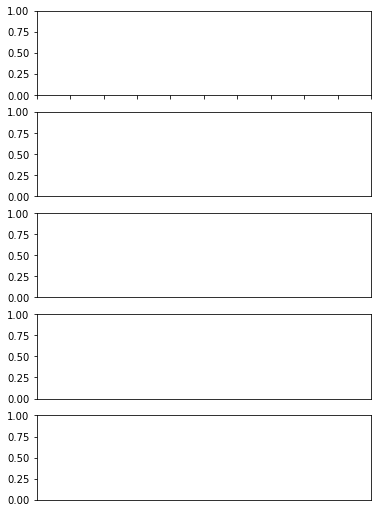

In [9]:

for i,j in zip(st_t,en_t):
    ptitle=f"{omni_df.iloc[i]['Time']}-{omni_df.iloc[j]['Time']}"
    
    fig, axes = plt.subplots(5, figsize=(6, 9), sharex=True)
    axes[0].plot(omni_df.iloc[i:j]['Time'],omni_df.iloc[i:j]['BZ_GSM'], ytitle='Bz')
    axes[1].plot(omni_df.iloc[i:j]['Time'],omni_df.iloc[i:j]['V'], ytitle='V')
    axes[2].plot(omni_df.iloc[i:j]['Time'],omni_df.iloc[i:j]['N'], ytitle='N')
    axes[3].plot(omni_df.iloc[i:j]['Time'],omni_df.iloc[i:j]['Pressure'], ytitle='Pressure')
    axes[4].plot(omni_df.iloc[i:j]['Time'],omni_df.iloc[i:j]['DST'], ytitle='Dst')
    
    #round axis to the nearest day
    datemin = np.datetime64(omni_df.iloc[i]['Time'], 'D')
    datemax = np.datetime64(omni_df.iloc[j]['Time'], 'D') + np.timedelta64(1, 'D')
    axes[4].set_xlim(datemin, datemax)
    # Text in the x axis will be displayed in 'yy-mm-dd' format.
    date_form = mdates.DateFormatter("%y/%m/%d")
    axes[4].xaxis.set_major_formatter(date_form)
    fig.autofmt_xdate()
    axes[0].set_title(f"{omni_df.iloc[i]['Time']} to {omni_df.iloc[j]['Time']}")
    plt.show()

